# Exploratory Data Analysis

Use conda_pytorch_p36 kernel

This notebook is for the exploratory data analysis section of the project. The following steps will be taken in order to aide the rest of the process:

1. The data will be downloaded from the Kaggle repository (https://www.kaggle.com/c/freesound-audio-tagging-2019/data) using the method outlined in the following forum:

https://www.kaggle.com/c/deepfake-detection-challenge/discussion/129521

2. The data will then be unzipped within the local notebook instance until later
3. All relevant libraries will be installed
4. The csv files will inspected, view the labels, sample rates, bit-rates, lengths, channels (mono/stereo) for each file in order to direct initial signal processing stage and approach towards the dataset splitting.
5. All corrupted/empty files as detailed within the original Kaggle competition site
5. The data will further be split into training, validation and test sets as appropriate. In the initial model development and data augmentation stage a subset of the data will be used to allow for fast iteration and evaluation of the model. 

## Data Downloading and Unpacking

First let's download the data directly from Kaggle using the instructions at: https://www.kaggle.com/c/deepfake-detection-challenge/discussion/129521, using the terminal and:

"The links below are generated using CurlWGet (https://chrome.google.com/webstore/detail/curlwget/jmocjfidanebdlinpbcdkcmgdifblncg?hl=en).
* Install this Chrom extension in your local machine.
* Start downloading a database to your local machine.
* Click on the extension logo in the top right of your browser, where you can copy the download link.
* After that, you can stop the downloading process in the local machine.
* Please note that download the dataset after you cd SageMaker/"

```wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/10700/503808/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1584897601&Signature=ncKXxHTMxBoS30m%2FBXznknO56%2BMNEQqDGAU07hCTHb9VrfBKWTYb0WAm5Fwl7lBfV318%2BAUWlFXfzISZKiukFggvIqknFNFpjt2xGJhgr8%2B0PIpRko0%2F02Xj9QdYYx3epKkD6D6nrdki8IXSq04GJAoNUJuAhoRoYSWGai7jHXvigykBWlO%2BUkg%2Br9okd%2FTs1E5pEC1WVbRX5qK5v7qUqEobG4TOkfw0bcuRMA3VSpbCTXbg22WtwqSiKGY5A43GrEuyT9lWv85X%2FubJB%2FdBjJaJc%2FIWL6mTfdbu2Ch5imEx7gbBxTE6WJs2GrLK2MFNlSksueoZ8YVYTcKzB0hY0Q%3D%3D&response-content-disposition=attachment%3B+filename%3Dfreesound-audio-tagging-2019.zip" -O "freesound-audio-tagging-2019.zip" -c```


**Now downloaded, we can unzip the files**

In [ ]:
# !unzip -d ../data ../data.zip # Unzip main folder

In [ ]:
# !unzip -d ../data/test ../data/test.zip # Unzip test files

In [ ]:
# !unzip -d ../data/train_curated ../data/train_curated.zip # Unzip train curated files

In [ ]:
# !unzip -d ../data/train_noisy ../data/train_noisy.zip # Unzip train noisy files

Now delete the files:

In [19]:
#!rm ../data/test.zip
#!rm ../data/train_curated.zip
#!rm ../data/train_noisy.zip
#!rm ../data.zip

## EDA

In [20]:
# Import required libraries

import numpy as np
import pandas as pd

**Create Dataframes from csv files**

**Note: Delete Corrupted and empty files list in Kaggle Competition Note**

*The following 5 audio files in the curated train set have a wrong label, due to a bug in the file renaming process: f76181c4.wav, 77b925c2.wav, 6a1f682a.wav, c7db12aa.wav, 7752cc8a.wav*

*The audio file 1d44b0bd.wav in the curated train set was found to be corrupted (contains no signal) due to an error in format conversion.*

In [21]:
# Create train_curated Dataframe

def create_train_curated_df(file, remove_files=[]):
    df_curated = pd.read_csv(file)
    df_curated.set_index('fname', inplace=True)
    df_curated.loc[remove_files]
    df_curated.drop(index=remove_files, inplace=True)
    df_curated.reset_index(inplace=True)
    return df_curated

def create_train_noisy_df(file, remove_files=[]):
    df_noisy = pd.read_csv(file)
    df_noisy.set_index('fname', inplace=True)
    df_noisy.loc[remove_files]
    df_noisy.drop(index=remove_files, inplace=True)
    df_noisy.reset_index(inplace=True)
    return df_noisy

In [22]:
# Create Curated training set df

remove_files = ['f76181c4.wav', '77b925c2.wav', '6a1f682a.wav', 'c7db12aa.wav', '7752cc8a.wav', '1d44b0bd.wav']
df_curated = create_train_curated_df('../data/train_curated.csv', remove_files=remove_files)
df_curated.head()

,fname,labels
0,0006ae4e.wav,Bark
1,0019ef41.wav,Raindrop
2,001ec0ad.wav,Finger_snapping
3,0026c7cb.wav,Run
4,0026f116.wav,Finger_snapping


In [23]:
df_curated.describe()

,fname,labels
count,4964,4964
unique,4964,213
top,874adfa0.wav,Gong
freq,1,75


In [24]:
# Create train_noise Dataframe
df_noisy = create_train_curated_df('../data/train_noisy.csv')
df_noisy.head()

,fname,labels
0,00097e21.wav,Bathtub_(filling_or_washing)
1,000b6cfb.wav,Motorcycle
2,00116cd2.wav,"Marimba_and_xylophone,Glockenspiel"
3,00127d14.wav,"Water_tap_and_faucet,Sink_(filling_or_washing)"
4,0019adae.wav,Raindrop


In [25]:
df_noisy.describe()

,fname,labels
count,19815,19815
unique,19815,1168
top,0fe8e2f6.wav,Waves_and_surf
freq,1,291


## Add Additional Parameters

https://pytorch.org/audio/

https://pytorch.org/tutorials/beginner/audio_preprocessing_tutorial.html

As part of the data analysis and to inform the later processing it would be useful to also know the following parameters of the files:

* Duration
* Sample Rate
* Channels
* Bit Rates

Therefore, this information will be extracted from the files using additional packages as follows.

In [ ]:
# Install dependencies
%%capture
!conda install -c pytorch torchaudio --yes ;

In [55]:
import torch
import torchaudio
from tqdm import tqdm
from pathlib import Path

In [56]:
## Create pandas dataframe containing all audio metadata

def extract_audio_params(dataframe, train_set=''):
    df = dataframe
    audio_dict = {}
    durations = []
    sample_rates = []
    channels = []    
    bits = []
    encodings = []

    
    for ind in tqdm(df.index):
        filepath = Path('../data/',train_set,dataframe['fname'][ind])
#         print(filepath)
        si, ei = torchaudio.info(str(filepath)) # gets info without loading for faster processing
        sr, channel, encoding, bitrate = si.rate, si.channels, ei.encoding, ei.bits_per_sample
        waveform, sample_rate = torchaudio.load(filepath)
        duration = round(waveform.size()[1]/sample_rate)

        durations.append(duration)
        sample_rates.append(sample_rate)
        channels.append(channel)
        bits.append(bitrate)
        encodings.append(str(encoding)) #.split('_')[-1])
    
    audio_dict = {'duration,s': durations, 'sample rate,Hz': sample_rates, 'channels': channels, 'bits': bits, 'encoding': encodings}
    
    df_audio = pd.DataFrame.from_dict(audio_dict)
#     print(df_audio)
    df = pd.concat([dataframe, df_audio], axis=1)
    
    return df

In [57]:
df_curated_ext = extract_audio_params(df_curated, train_set='train_curated')
df_curated_ext.head()

100%|██████████| 4964/4964 [01:01<00:00, 80.47it/s] 


,fname,labels,"duration,s","sample rate,Hz",channels,bits,encoding
0,0006ae4e.wav,Bark,7,44100,1,16,sox_encoding_t.SOX_ENCODING_SIGN2
1,0019ef41.wav,Raindrop,2,44100,1,16,sox_encoding_t.SOX_ENCODING_SIGN2
2,001ec0ad.wav,Finger_snapping,2,44100,1,16,sox_encoding_t.SOX_ENCODING_SIGN2
3,0026c7cb.wav,Run,26,44100,1,16,sox_encoding_t.SOX_ENCODING_SIGN2
4,0026f116.wav,Finger_snapping,1,44100,1,16,sox_encoding_t.SOX_ENCODING_SIGN2


In [58]:
df_noisy_ext = extract_audio_params(df_noisy, train_set='train_noisy')
df_noisy_ext.head()

100%|██████████| 19815/19815 [07:24<00:00, 44.59it/s]


,fname,labels,"duration,s","sample rate,Hz",channels,bits,encoding
0,00097e21.wav,Bathtub_(filling_or_washing),15,44100,1,16,sox_encoding_t.SOX_ENCODING_SIGN2
1,000b6cfb.wav,Motorcycle,15,44100,1,16,sox_encoding_t.SOX_ENCODING_SIGN2
2,00116cd2.wav,"Marimba_and_xylophone,Glockenspiel",15,44100,1,16,sox_encoding_t.SOX_ENCODING_SIGN2
3,00127d14.wav,"Water_tap_and_faucet,Sink_(filling_or_washing)",15,44100,1,16,sox_encoding_t.SOX_ENCODING_SIGN2
4,0019adae.wav,Raindrop,15,44100,1,16,sox_encoding_t.SOX_ENCODING_SIGN2


## Visualise / Listen to Audio Data

https://musicinformationretrieval.com/ipython_audio.html

In [59]:
import matplotlib.pyplot as plt
import IPython.display as ipd

**View Waveform**

In [69]:
fileset = df_curated_ext['fname']
file_iterator = iter(fileset)

Shape of waveform: torch.Size([1, 146670])
Sample rate of waveform: 44100
File: ee828b30.wav 
Row, Label:  4620    Glockenspiel
Name: labels, dtype: object


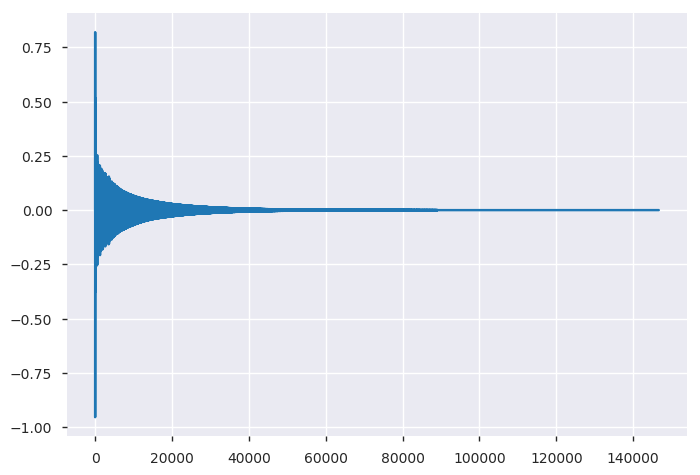

In [84]:
# Re-run cell to get move through all samples
import random

#filename = next(file_iterator) #iterate in order
filename = random.sample(list(fileset),1)[0] #iterate randomly

filepath = Path("../data/train_curated", filename)

waveform, sample_rate = torchaudio.load(filepath)
print("Shape of waveform: {}".format(waveform.size()))
print("Sample rate of waveform: {}".format(sample_rate))


row = df_curated_ext[df_curated_ext["fname"] == filename].index
label = df_curated_ext.iloc[row]['labels']
print('File:', filename, '\nRow, Label: ', label)
plt.figure()
plt.plot(waveform.t().numpy())
ipd.Audio(str(filepath)) # load for playing


**Install further libraries for Pandas Profiling**

Update Conda to remove initial install problems due to incompatible packages

In [95]:
#%%capture #suppress-output

!conda install -c conda-forge pandas-profiling --yes
#!pip install pandas-profiling

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.12
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



## Pandas Profiling of extended csv files

**Curated train set**

In [100]:
# Create pandas profiling report
import pandas_profiling
pandas_profiling.ProfileReport(df_curated_ext) #, title='Curated Train Set Report')

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


Number of variables,7
Number of observations,4964
Total Missing (%),0.0%
Total size in memory,271.5 KiB
Average record size in memory,56.0 B
Numeric,1
Categorical,1
Boolean,0
Date,0
Text (Unique),1
Rejected,4


**Noisy Train set**

In [99]:
pandas_profiling.ProfileReport(df_noisy_ext)

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


Number of variables,7
Number of observations,19815
Total Missing (%),0.0%
Total size in memory,1.1 MiB
Average record size in memory,56.0 B
Numeric,1
Categorical,1
Boolean,0
Date,0
Text (Unique),1
Rejected,4


## EDA Comments


**Labels**

The original Kaggle competition states that the audio is labelled with 80 labels from Google Audioset Ontology.

*Curated train set* - the number of different labels are stated to be 213, which indicates different combinations of the Audioset Ontology labelling within the multi-label classification of the data.

*Noisy train set* - the number of different labels are stated to be 1168, which indicates a very varied combinations of the Audioset Ontology labelling within the multi-label classification of the data. This indicates significantly more combinations the the curated train set. As such, it may be wise in the train/validation split to take a similar weighted proportion of each curated and noisy train set, in order to train on a wider variety of these labelling scenarios.

After training is made and the model validated for accuracy, the entire dataset from both curated and noisy datasets could be used to train the model again from scratch in order to gain the widest variety of labelling scenarios available. 

Naturally the test set, being a Kaggle Competition dataset, has no labels and will not be used for training or validation before deployment.

**Duration**

*Curated train set* - Although pandas profiling states there are some items with 0s duration, this is due to the rounding applied in the duration calculation. The audio clip duration ranges between 0 and 30 seconds maximum, with ~50% of these being 5s or less.


*Noisy train set* - The durations range between 1 and 16s, with the majority >90% being over 15s long. Therefore the curated train set has significantly longer clips on average and this will need to be taken account in the clipping of the audio files, as the sepctrogram image tensors will need to be the same dimension in order to feed these into the neural network in batches.